In [223]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')
app_data = pd.read_csv('application_data.csv')
prev_app = pd.read_csv('previous_application.csv')
sns.set_palette('Set2')


# Data Cleaning - Application Dataset
##### Checking sample of application data

In [224]:
#Increasing the number of visible rows and columns to 200
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

##### Checking details about application data

In [225]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [226]:
app_data.shape

(307511, 122)

##### Checking sample of previous application data

In [227]:
prev_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


##### Checking details about previous application data

In [228]:
prev_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

##### Checking duplicates in both datasets

In [229]:
print(app_data.duplicated().sum())
print(prev_app.duplicated().sum())

0
0


##### Changing SKU ID datatypes to string in both datasets

In [230]:
app_data['SK_ID_CURR'] = app_data['SK_ID_CURR'].astype('string')
prev_app[['SK_ID_PREV','SK_ID_CURR']] =prev_app[['SK_ID_PREV','SK_ID_CURR']].astype('string')

##### Checking datatypes of columns in previous application data

In [231]:
prev_app.dtypes

SK_ID_PREV                      string
SK_ID_CURR                      string
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
RATE_DOWN_PAYMENT              float64
RATE_INTEREST_PRIMARY          float64
RATE_INTEREST_PRIVILEGED       float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE             

##### Dropping the columns with Flag data as we wont be using it for our analysis

In [232]:
#Identifying the columns that starts with FLAG and then drop it
for flag in app_data.columns:
    if flag[0:4]=='FLAG':
        app_data.drop(flag,inplace=True,axis=1)

##### Converting the columns with negative days count to absolute value and then to years

In [233]:
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0

In [234]:
# Converting to absolute value to remove negatives
def func(x):
    return abs(x)
for cols in  ['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']:
    app_data[cols]= app_data[cols].apply(func)

# Converting days to years
def age(x):
    return x//365
for cols in  ['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']:
    app_data[cols]= app_data[cols].apply(age)

#Renaming the columns since they have been converted to years
app_data.rename(columns={'DAYS_BIRTH': 'YEARS_BIRTH'}, inplace=True)
app_data.rename(columns={'DAYS_EMPLOYED': 'YEARS_EMPLOYED'}, inplace=True)
app_data.rename(columns={'DAYS_REGISTRATION': 'YEARS_REGISTRATION'}, inplace=True)
app_data.rename(columns={'DAYS_ID_PUBLISH': 'YEARS_ID_PUBLISH'}, inplace=True)
app_data.rename(columns={'DAYS_LAST_PHONE_CHANGE': 'YEARS_LAST_PHONE_CHANGE'}, inplace=True)
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,OWN_CAR_AGE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,YEARS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25,1,9.0,5,NaN,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45,3,3.0,0,NaN,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52,0,11.0,6,26.0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,52,8,26.0,6,NaN,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,

In [235]:
prev_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


##### Checking % of missing values in the columns in the application data dataframe

In [236]:
# Checking the % of missing values in all columns
(app_data.isnull().mean()*100).sort_values(ascending=False)

COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
COMMONAREA_MEDI                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MEDI           68.354953
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MEDI                  67.848630
FLOORSMIN_MODE                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_AVG                    59.376738
LANDAREA_MODE                   59.376738
BASEMENTAREA_MODE               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MEDI               58.515956
EXT_SOURCE_1                    56

##### Deleting columns in application data with a missing value percentage greater than or equal to 47


In [237]:
#Identifying columns with a greater missing value than 47% and then dropping those columns
for x in app_data.columns:
    if (app_data[x].isnull().sum()/len(app_data))*100>=47:
        app_data.drop( x, axis=1, inplace=True) 

In [238]:
#Rechecking the missing values after dropping
(app_data.isnull().sum()/len(app_data)*100).sort_values(ascending=False)

OCCUPATION_TYPE                31.345545
EXT_SOURCE_3                   19.825307
AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
AMT_REQ_CREDIT_BUREAU_QRT      13.501631
AMT_REQ_CREDIT_BUREAU_MON      13.501631
AMT_REQ_CREDIT_BUREAU_WEEK     13.501631
AMT_REQ_CREDIT_BUREAU_DAY      13.501631
AMT_REQ_CREDIT_BUREAU_HOUR     13.501631
NAME_TYPE_SUITE                 0.420148
DEF_30_CNT_SOCIAL_CIRCLE        0.332021
OBS_30_CNT_SOCIAL_CIRCLE        0.332021
OBS_60_CNT_SOCIAL_CIRCLE        0.332021
DEF_60_CNT_SOCIAL_CIRCLE        0.332021
EXT_SOURCE_2                    0.214626
AMT_GOODS_PRICE                 0.090403
AMT_ANNUITY                     0.003902
CNT_FAM_MEMBERS                 0.000650
YEARS_LAST_PHONE_CHANGE         0.000325
REG_REGION_NOT_LIVE_REGION      0.000000
ORGANIZATION_TYPE               0.000000
LIVE_CITY_NOT_WORK_CITY         0.000000
REG_CITY_NOT_WORK_CITY          0.000000
REG_CITY_NOT_LIVE_CITY          0.000000
LIVE_REGION_NOT_WORK_REGION     0.000000
REG_REGION_NOT_W

##### Checking the percentage of value counts for the columns with 13% missing values
##### These columns represent the number of enquiries, so taking mean or median can give floating point values which does not make sense for the number of enquiries. Hence we are going for mode and since the highest number of values is for '0' value, it is the mode for all these columns, hence we will impute the missing values in these columns with the mode, i.e 0

In [239]:
#Checking the % of value counts for these columns. It has been converted to dictionary for easy of reading
print(dict(round(app_data['AMT_REQ_CREDIT_BUREAU_HOUR'].value_counts(normalize=True),2)*100))
print(dict(round(app_data['AMT_REQ_CREDIT_BUREAU_WEEK'].value_counts(normalize=True),2)*100))
print(dict(round(app_data['AMT_REQ_CREDIT_BUREAU_DAY'].value_counts(normalize=True),2)*100))
print(dict(round(app_data['AMT_REQ_CREDIT_BUREAU_MON'].value_counts(normalize=True),2)*100))
print(dict(round(app_data['AMT_REQ_CREDIT_BUREAU_QRT'].value_counts(normalize=True),2)*100))
print(dict(round(app_data['AMT_REQ_CREDIT_BUREAU_YEAR'].value_counts(normalize=True),2)*100))

{0.0: 99.0, 1.0: 1.0, 2.0: 0.0, 3.0: 0.0, 4.0: 0.0}
{0.0: 97.0, 1.0: 3.0, 2.0: 0.0, 3.0: 0.0, 4.0: 0.0, 6.0: 0.0, 5.0: 0.0, 8.0: 0.0, 7.0: 0.0}
{0.0: 99.0, 1.0: 0.0, 2.0: 0.0, 3.0: 0.0, 4.0: 0.0, 5.0: 0.0, 6.0: 0.0, 9.0: 0.0, 8.0: 0.0}
{0.0: 84.0, 1.0: 12.0, 2.0: 2.0, 3.0: 1.0, 4.0: 0.0, 5.0: 0.0, 6.0: 0.0, 7.0: 0.0, 9.0: 0.0, 8.0: 0.0, 10.0: 0.0, 11.0: 0.0, 12.0: 0.0, 13.0: 0.0, 14.0: 0.0, 15.0: 0.0, 16.0: 0.0, 17.0: 0.0, 18.0: 0.0, 19.0: 0.0, 27.0: 0.0, 22.0: 0.0, 23.0: 0.0, 24.0: 0.0}
{0.0: 81.0, 1.0: 13.0, 2.0: 5.0, 3.0: 1.0, 4.0: 0.0, 5.0: 0.0, 6.0: 0.0, 8.0: 0.0, 7.0: 0.0, 19.0: 0.0, 261.0: 0.0}
{0.0: 27.0, 1.0: 24.0, 2.0: 19.0, 3.0: 13.0, 4.0: 8.0, 5.0: 5.0, 6.0: 3.0, 7.0: 1.0, 8.0: 1.0, 9.0: 0.0, 11.0: 0.0, 12.0: 0.0, 10.0: 0.0, 13.0: 0.0, 14.0: 0.0, 17.0: 0.0, 15.0: 0.0, 18.0: 0.0, 19.0: 0.0, 16.0: 0.0, 25.0: 0.0, 21.0: 0.0, 22.0: 0.0, 20.0: 0.0, 23.0: 0.0}


In [240]:
#Since 0 is the mode for all these columns, we are filling the NA's with 0, i.e. the mode
app_data['AMT_REQ_CREDIT_BUREAU_HOUR']=app_data['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(app_data['AMT_REQ_CREDIT_BUREAU_HOUR'].mode()[0])
app_data['AMT_REQ_CREDIT_BUREAU_WEEK']=app_data['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(app_data['AMT_REQ_CREDIT_BUREAU_WEEK'].mode()[0])
app_data['AMT_REQ_CREDIT_BUREAU_DAY']=app_data['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(app_data['AMT_REQ_CREDIT_BUREAU_DAY'].mode()[0])
app_data['AMT_REQ_CREDIT_BUREAU_MON']=app_data['AMT_REQ_CREDIT_BUREAU_MON'].fillna(app_data['AMT_REQ_CREDIT_BUREAU_MON'].mode()[0])
app_data['AMT_REQ_CREDIT_BUREAU_QRT']=app_data['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(app_data['AMT_REQ_CREDIT_BUREAU_QRT'].mode()[0])
app_data['AMT_REQ_CREDIT_BUREAU_YEAR']=app_data['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(app_data['AMT_REQ_CREDIT_BUREAU_YEAR'].mode()[0])

##### Checking the % of missing values in remaining columns

In [241]:
(app_data.isnull().mean()*100).sort_values(ascending=False)

OCCUPATION_TYPE                31.345545
EXT_SOURCE_3                   19.825307
NAME_TYPE_SUITE                 0.420148
OBS_60_CNT_SOCIAL_CIRCLE        0.332021
OBS_30_CNT_SOCIAL_CIRCLE        0.332021
DEF_30_CNT_SOCIAL_CIRCLE        0.332021
DEF_60_CNT_SOCIAL_CIRCLE        0.332021
EXT_SOURCE_2                    0.214626
AMT_GOODS_PRICE                 0.090403
AMT_ANNUITY                     0.003902
CNT_FAM_MEMBERS                 0.000650
YEARS_LAST_PHONE_CHANGE         0.000325
ORGANIZATION_TYPE               0.000000
LIVE_CITY_NOT_WORK_CITY         0.000000
REG_CITY_NOT_WORK_CITY          0.000000
REG_CITY_NOT_LIVE_CITY          0.000000
LIVE_REGION_NOT_WORK_REGION     0.000000
SK_ID_CURR                      0.000000
REG_REGION_NOT_LIVE_REGION      0.000000
AMT_REQ_CREDIT_BUREAU_HOUR      0.000000
AMT_REQ_CREDIT_BUREAU_DAY       0.000000
AMT_REQ_CREDIT_BUREAU_WEEK      0.000000
AMT_REQ_CREDIT_BUREAU_MON       0.000000
AMT_REQ_CREDIT_BUREAU_QRT       0.000000
REG_REGION_NOT_W

In [242]:
#The column EXT_SOURCE_3 has around 20% of missing values. 
#Inorder to impute the right value, we are checking the spread of values in this column
app_data['EXT_SOURCE_3'].describe()

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

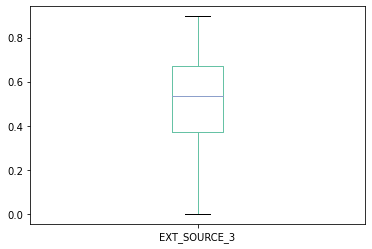

In [243]:
app_data['EXT_SOURCE_3'].plot.box()
plt.show()

In [244]:
#Since the mean and median are almost the same, i.e 0.5, we are imputing the missing values with the median
app_data['EXT_SOURCE_3']=app_data['EXT_SOURCE_3'].fillna(app_data['EXT_SOURCE_3'].median())

In [245]:
#Replacing the invalid values 'XNA' with NaN and then checking the missing values
app_data = app_data.replace('XNA',np.nan)
(app_data.isnull().mean()*100).sort_values(ascending=False)

OCCUPATION_TYPE                31.345545
ORGANIZATION_TYPE              18.007161
NAME_TYPE_SUITE                 0.420148
DEF_60_CNT_SOCIAL_CIRCLE        0.332021
OBS_60_CNT_SOCIAL_CIRCLE        0.332021
DEF_30_CNT_SOCIAL_CIRCLE        0.332021
OBS_30_CNT_SOCIAL_CIRCLE        0.332021
EXT_SOURCE_2                    0.214626
AMT_GOODS_PRICE                 0.090403
AMT_ANNUITY                     0.003902
CODE_GENDER                     0.001301
CNT_FAM_MEMBERS                 0.000650
YEARS_LAST_PHONE_CHANGE         0.000325
REG_CITY_NOT_LIVE_CITY          0.000000
REG_CITY_NOT_WORK_CITY          0.000000
LIVE_CITY_NOT_WORK_CITY         0.000000
SK_ID_CURR                      0.000000
EXT_SOURCE_3                    0.000000
REG_REGION_NOT_WORK_REGION      0.000000
AMT_REQ_CREDIT_BUREAU_HOUR      0.000000
AMT_REQ_CREDIT_BUREAU_DAY       0.000000
AMT_REQ_CREDIT_BUREAU_WEEK      0.000000
AMT_REQ_CREDIT_BUREAU_MON       0.000000
AMT_REQ_CREDIT_BUREAU_QRT       0.000000
LIVE_REGION_NOT_

##### Since the columns other than Occupation Type % Organization Type have less than 0.5% missing values, we will drop those rows

In [246]:
# Loop to get a list of columns where the missing values% are greater than 0 and less than 1, excluding occupation type
l1=[]
for col in ((app_data.isnull().mean()*100)).index:
    if ((app_data[col].isnull().mean()*100)>0) & ((app_data[col].isnull().mean()*100)<=1) & (col!='OCCUPATION_TYPE'):
        l1.append(col)

# Dropping the rows where the missing values% from the above columns are between 0 and 1
for null in l1:
    app_data.dropna(subset=[null], inplace=True)

In [247]:
# Checking missing values
(app_data.isnull().mean()*100).sort_values(ascending=False)

OCCUPATION_TYPE                31.338108
ORGANIZATION_TYPE              18.012196
SK_ID_CURR                      0.000000
EXT_SOURCE_3                    0.000000
REG_REGION_NOT_LIVE_REGION      0.000000
REG_REGION_NOT_WORK_REGION      0.000000
LIVE_REGION_NOT_WORK_REGION     0.000000
REG_CITY_NOT_LIVE_CITY          0.000000
REG_CITY_NOT_WORK_CITY          0.000000
LIVE_CITY_NOT_WORK_CITY         0.000000
EXT_SOURCE_2                    0.000000
OBS_30_CNT_SOCIAL_CIRCLE        0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
DEF_30_CNT_SOCIAL_CIRCLE        0.000000
OBS_60_CNT_SOCIAL_CIRCLE        0.000000
DEF_60_CNT_SOCIAL_CIRCLE        0.000000
YEARS_LAST_PHONE_CHANGE         0.000000
AMT_REQ_CREDIT_BUREAU_HOUR      0.000000
AMT_REQ_CREDIT_BUREAU_DAY       0.000000
AMT_REQ_CREDIT_BUREAU_WEEK      0.000000
AMT_REQ_CREDIT_BUREAU_MON       0.000000
AMT_REQ_CREDIT_BUREAU_QRT       0.000000
HOUR_APPR_PROCESS_START         0.000000
REGION_RATING_CLIENT_W_CITY     0.000000
TARGET          

##### Checking the value counts of Organization Type to check if there is a definite pattern to impute missing values. 
##### Since the values are quite spread out, the missing values are left as it is to prevent any distortion to our analysis due to imputation with incorrect organization type

In [248]:
app_data['ORGANIZATION_TYPE'].value_counts(normalize=True)*100

Business Entity Type 3    26.943026
Self-employed             15.239011
Other                      6.627015
Medicine                   4.436568
Business Entity Type 2     4.188645
Government                 4.128567
School                     3.533794
Trade: type 7              3.111645
Kindergarten               2.732352
Construction               2.667067
Business Entity Type 1     2.370281
Transport: type 4          2.143987
Trade: type 3              1.378993
Industry: type 9           1.332933
Industry: type 3           1.302894
Security                   1.287674
Housing                    1.175528
Industry: type 11          1.075398
Military                   1.045359
Bank                       0.983278
Agriculture                0.975668
Police                     0.928807
Transport: type 2          0.874737
Postal                     0.855913
Security Ministries        0.782217
Trade: type 2              0.749374
Restaurant                 0.718534
Services                   0

##### Checking the value counts of Occupation Type to check if there is a definite pattern to impute missing values. 
##### Since the values are quite spread out, the missing values are left as it is to prevent any distortion to our analysis due to imputation with incorrect occupation type

In [249]:
app_data['OCCUPATION_TYPE'].value_counts()

Laborers                 54730
Sales staff              31790
Core staff               27262
Managers                 21114
Drivers                  18456
High skill tech staff    11261
Accountants               9698
Medicine staff            8459
Security staff            6667
Cooking staff             5898
Cleaning staff            4615
Private service staff     2629
Low-skill Laborers        2076
Waiters/barmen staff      1335
Secretaries               1293
Realty agents              742
HR staff                   558
IT staff                   511
Name: OCCUPATION_TYPE, dtype: int64

##### Capping the outliers from Income, Annuity, Good Price and Credit to the upper fence or lower fence

In [250]:
for col in ['AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','AMT_INCOME_TOTAL']:
    percentile_25 = app_data[col].quantile(0.25)
    percentile_75 = app_data[col].quantile(0.75)
    iqr = percentile_75-percentile_25
    upper = percentile_75 + 1.5*iqr
    lower = percentile_25 - 1.5*iqr
    def capping(x):
        if x<=lower:
            return lower
        elif x>=upper:
            return upper
        else:
            return x
    app_data[col] = app_data[col].apply(capping)

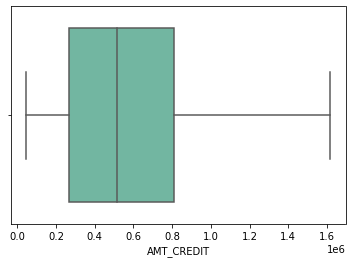

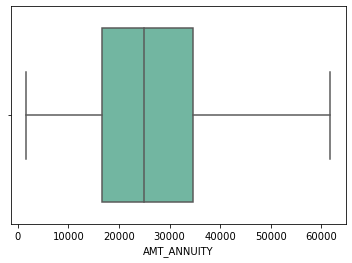

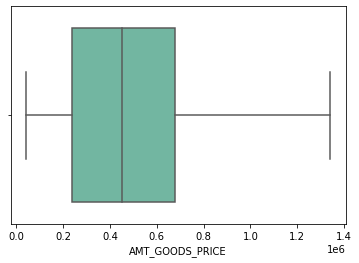

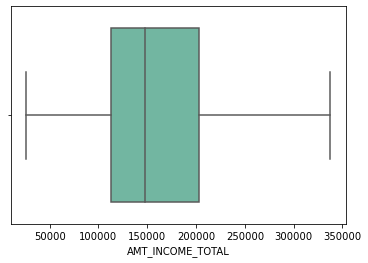

In [251]:
#Checking the boxplots for the columns above after replacing outliers with upper and lower fence
for col in ['AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','AMT_INCOME_TOTAL']:
    sns.boxplot(app_data[col])
    plt.show()

##### Consolidating the different categories in Organization Type

In [252]:
#Checking the types of organization types and replacing 'XNA' with NaN
print(app_data['ORGANIZATION_TYPE'].value_counts().sort_index())
app_data['ORGANIZATION_TYPE']=app_data['ORGANIZATION_TYPE'].replace('XNA',np.nan)

print('--------------------------------------------------------------------------')
print()
#Dropping the rows with NaN
app_data.dropna(subset=['ORGANIZATION_TYPE'], inplace=True)

#Consolidating the different types of Industry,Trade and Transport:
def consol(x):
    if x[0:8]=='Industry':
        return 'Industry'
    elif x[0:5]=='Trade':
        return 'Trade'
    elif x[0:9]=='Transport':
        return 'Transport'
    elif x[0:8]=='Business':
        return 'Business'
    else:
        return x
app_data['ORGANIZATION_TYPE'] = app_data['ORGANIZATION_TYPE'].apply(consol)

print(app_data['ORGANIZATION_TYPE'].value_counts().sort_index())

Advertising                 428
Agriculture                2436
Bank                       2455
Business Entity Type 1     5918
Business Entity Type 2    10458
Business Entity Type 3    67270
Cleaning                    254
Construction               6659
Culture                     373
Electricity                 940
Emergency                   552
Government                10308
Hotel                       959
Housing                    2935
Industry: type 1           1034
Industry: type 10           109
Industry: type 11          2685
Industry: type 12           368
Industry: type 13            65
Industry: type 2            457
Industry: type 3           3253
Industry: type 4            873
Industry: type 5            590
Industry: type 6            112
Industry: type 7           1295
Industry: type 8             24
Industry: type 9           3328
Insurance                   591
Kindergarten               6822
Legal Services              303
Medicine                  11077
Military

# Data Cleaning - Previous Application Dataset

##### Checking % of missing values in the columns in the previous applications dataframe

In [253]:
# Missing values before replacing 'XAP' and 'XNA' with NaN values
print((prev_app.isnull().mean()*100).sort_values(ascending=False))
print()
print()

#Replacing the invalid values 'XNA' and 'XAP' with NaN values
prev_app=prev_app.replace('XNA',np.nan)
prev_app=prev_app.replace('XAP',np.nan)

#Checking missing values after replacing 'XAP' and 'XNA' with NaN values
print((prev_app.isnull().mean()*100).sort_values(ascending=False))

RATE_INTEREST_PRIVILEGED       99.643698
RATE_INTEREST_PRIMARY          99.643698
AMT_DOWN_PAYMENT               53.636480
RATE_DOWN_PAYMENT              53.636480
NAME_TYPE_SUITE                49.119754
NFLAG_INSURED_ON_APPROVAL      40.298129
DAYS_TERMINATION               40.298129
DAYS_LAST_DUE                  40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_FIRST_DUE                 40.298129
DAYS_FIRST_DRAWING             40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
NAME_YIELD_GROUP                0.000000
NAME_PORTFOLIO                  0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
SK_ID_PREV                      0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE

##### Apart from other columns, as seen above, even though NAME_CASH_LOAN purpose is an important column, the number of missing values before replacing XNA and XAP in that column went from 0% to 95% after replacement. Hence this column will be dropped along with other columns having more than 40% missing values to prevent any incorrect inference from our analysis

##### Dropping the columns with more than 40% of missing values and then checking the % of missing values in remaining columns

In [254]:
for y in prev_app.columns:
    if (prev_app[y].isnull().mean())*100>=40:
        prev_app.drop( y, axis=1, inplace=True) 

In [255]:
(prev_app.isnull().mean()*100).sort_values(ascending=False)

NAME_PAYMENT_TYPE              37.563091
NAME_YIELD_GROUP               30.966990
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
NAME_PORTFOLIO                 22.286366
NAME_CLIENT_TYPE                0.116213
PRODUCT_COMBINATION             0.020716
NAME_CONTRACT_TYPE              0.020716
AMT_CREDIT                      0.000060
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
SK_ID_PREV                      0.000000
DAYS_DECISION                   0.000000
NAME_CONTRACT_STATUS            0.000000
SK_ID_CURR                      0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
HOUR_APPR_PROCESS_START         0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
AMT_APPLICATION                 0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
dtype: float64

##### Since Goods price amount, Annuity amount and term of previous credit (CNT Payment) have more than 20% of missing values, we are checking the distribution of data points in these columns using a boxplot and 'describe' function

In [256]:
prev_app[['AMT_GOODS_PRICE','AMT_ANNUITY','CNT_PAYMENT']].describe()

,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_PAYMENT
count,1.284699e+06,1.297979e+06,1.297984e+06
mean,2.278473e+05,1.595512e+04,1.605408e+01
std,3.153966e+05,1.478214e+04,1.456729e+01
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.084100e+04,6.321780e+03,6.000000e+00
50%,1.123200e+05,1.125000e+04,1.200000e+01
75%,2.340000e+05,2.065842e+04,2.400000e+01
max,6.905160e+06,4.180581e+05,8.400000e+01


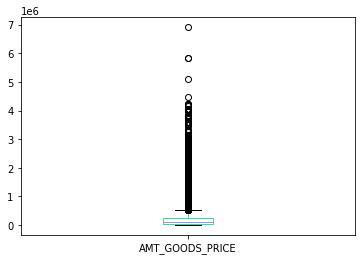

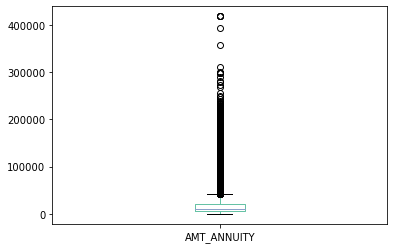

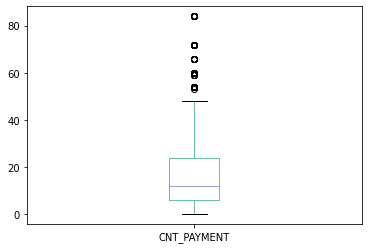

In [257]:
for col in ['AMT_GOODS_PRICE','AMT_ANNUITY','CNT_PAYMENT']:
    prev_app[col].plot.box()
    plt.show()

##### Capping the outliers to the upper and lower fence

In [258]:
for col in ['AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','AMT_APPLICATION','CNT_PAYMENT']:
    percentile_25 = prev_app[col].quantile(0.25) #Finding the 25th percentile
    percentile_75 = prev_app[col].quantile(0.75) #Finding the 75th percentile
    iqr = percentile_75-percentile_25 #Finding the IQR, 75th percentile - 25th percentile
    upper = percentile_75 + 1.5*iqr #Finding the upper fence
    lower = percentile_25 - 1.5*iqr #FInding the lower fence
    #Defining a function to replace the values above the upper fence with the upper fence and similarly for lower fence   
    def capping(x): 
        if x<=lower:
            return lower
        elif x>=upper:
            return upper
        else:
            return x
    prev_app[col] = prev_app[col].apply(capping)

##### Imputing the missing values in Goods price, Annuity amount and Term of previous credit with the median and then confirming that there are no more missing values.
##### The PRODUCT_COMBINATION, AMT_CREDIT, NAME_CONTRACT_TYPE, CODE_REJECT_REASON and NAME_CLIENT_TYPE columns have less than 1%, missing values so those ROWS can be dropped

In [259]:
#Imputing missing values with median
prev_app['AMT_GOODS_PRICE']= prev_app['AMT_GOODS_PRICE'].fillna(prev_app['AMT_GOODS_PRICE'].median())
prev_app['AMT_ANNUITY']= prev_app['AMT_ANNUITY'].fillna(prev_app['AMT_ANNUITY'].median())
prev_app['CNT_PAYMENT']= prev_app['CNT_PAYMENT'].fillna(prev_app['CNT_PAYMENT'].median())

#Dropping the rows in these columns where there are NaNs
prev_app.dropna(subset=['PRODUCT_COMBINATION'], inplace=True)
prev_app.dropna(subset=['AMT_CREDIT'], inplace=True)
prev_app.dropna(subset=['NAME_CLIENT_TYPE'], inplace=True)
prev_app.dropna(subset=['NAME_CONTRACT_TYPE'], inplace=True)

##### Since Payment Type has 'Cash through the bank' as 99% of the values, we shall impute the missing values in this column with 'Cash through the bank'. 
##### For the Yield Group and Portfolio Name, since there is no clear majority, we will leave them as it is 

In [260]:
print(prev_app['NAME_PAYMENT_TYPE'].value_counts(normalize=True)*100)
print()
print(prev_app['NAME_YIELD_GROUP'].value_counts(normalize=True)*100)
print()
print(prev_app['NAME_PORTFOLIO'].value_counts(normalize=True)*100)

Cash through the bank                        99.110191
Non-cash from your account                    0.785696
Cashless from the account of the employer     0.104113
Name: NAME_PAYMENT_TYPE, dtype: float64

middle        33.433374
high          30.659641
low_normal    27.926787
low_action     7.980198
Name: NAME_YIELD_GROUP, dtype: float64

POS      53.237883
Cash     35.559664
Cards    11.169687
Cars      0.032766
Name: NAME_PORTFOLIO, dtype: float64


In [261]:
#Imputing the missing calues in payment type with 'Cash through the bank'
prev_app['NAME_PAYMENT_TYPE']=prev_app['NAME_PAYMENT_TYPE'].fillna('Cash through the bank')

In [262]:
(prev_app.isnull().mean()*100).sort_values(ascending=False)

NAME_YIELD_GROUP               30.920077
NAME_PORTFOLIO                 22.233840
SK_ID_PREV                      0.000000
NAME_CONTRACT_STATUS            0.000000
CNT_PAYMENT                     0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_CLIENT_TYPE                0.000000
NAME_PAYMENT_TYPE               0.000000
DAYS_DECISION                   0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
SK_ID_CURR                      0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
HOUR_APPR_PROCESS_START         0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
AMT_GOODS_PRICE                 0.000000
AMT_CREDIT                      0.000000
AMT_APPLICATION                 0.000000
AMT_ANNUITY                     0.000000
NAME_CONTRACT_TYPE              0.000000
PRODUCT_COMBINATION             0.000000
dtype: float64

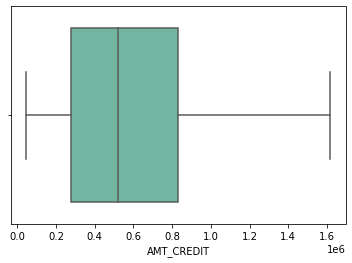

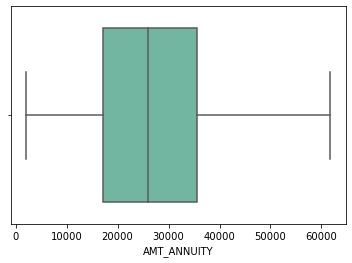

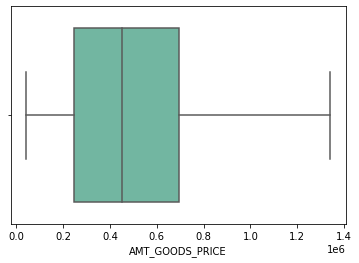

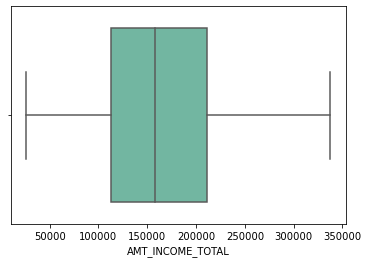

In [263]:
for col in ['AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','AMT_INCOME_TOTAL']:
    sns.boxplot(app_data[col])
    plt.show()

##### Converting the negative values in Days Decision to absolute values and then to years

In [264]:
# Converting to absolute value to remove negatives
def func(x):
    return abs(x)
for cols in  ['DAYS_DECISION']:
    prev_app[cols]= prev_app[cols].apply(func)

# Converting days to years, here we are using / instead of // as there are many rows with two digit days, so // will return a 0
def days(x):
    return x/365
for cols in  ['DAYS_DECISION']:
    prev_app[cols]= prev_app[cols].apply(days)

#Renaming the columns
prev_app.rename(columns={'DAYS_DECISION': 'YEARS_DECISION'}, inplace=True)
prev_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CONTRACT_STATUS,YEARS_DECISION,NAME_PAYMENT_TYPE,NAME_CLIENT_TYPE,NAME_PORTFOLIO,CHANNEL_TYPE,SELLERPLACE_AREA,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,Approved,0.200000,Cash through the bank,Repeater,POS,Country-wide,35,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,422820.0,504805.5,508738.5,THURSDAY,11,Y,1,Approved,0.449315,Cash through the bank,Repeater,Cash,Contact center,-1,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,1,Approved,0.824658,Cash through the bank,Repeater,Cash,Credit and cash offices,-1,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,42163.380,422820.0,470790.0,450000.0,MONDAY,7,Y,1,Approved,1.402740,Cash through the bank,Repeater,Cash,Credit and cash offices,-1,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,1,Refused,2.139726,Cash through the bank,Repeater,Cash,Credit and cash offices,-1,24.0,high,Cash Street: high


##

##

# Data Analysis & Visualization - Application Dataset

### Univariate Analysis
#### Checking percentage distribution of loan applicants across various categories and plotting countplots

In [265]:
for col in ['TARGET','CODE_GENDER','NAME_INCOME_TYPE','NAME_TYPE_SUITE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','OCCUPATION_TYPE','NAME_CONTRACT_TYPE','ORGANIZATION_TYPE']:
    print(col)
    print(app_data[col].value_counts(normalize=True)*100)
    print('------------------------------------------------------------------------------------')
    print()


TARGET
0    91.308701
1     8.691299
Name: TARGET, dtype: float64
------------------------------------------------------------------------------------

CODE_GENDER
F    62.328227
M    37.671773
Name: CODE_GENDER, dtype: float64
------------------------------------------------------------------------------------

NAME_INCOME_TYPE
Working                 63.017122
Commercial associate    28.354060
State servant            8.612797
Student                  0.006809
Businessman              0.004005
Pensioner                0.003204
Maternity leave          0.002003
Name: NAME_INCOME_TYPE, dtype: float64
------------------------------------------------------------------------------------

NAME_TYPE_SUITE
Unaccompanied      81.653349
Family             12.623611
Spouse, partner     3.852208
Children            0.895164
Other_B             0.585962
Other_A             0.304396
Group of people     0.085311
Name: NAME_TYPE_SUITE, dtype: float64
-------------------------------------------------

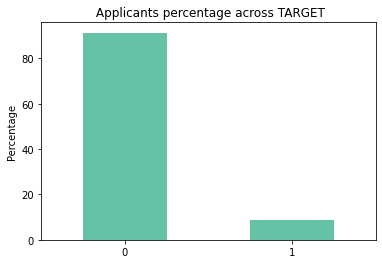

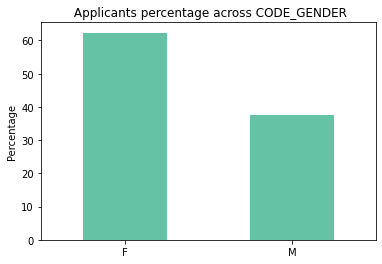

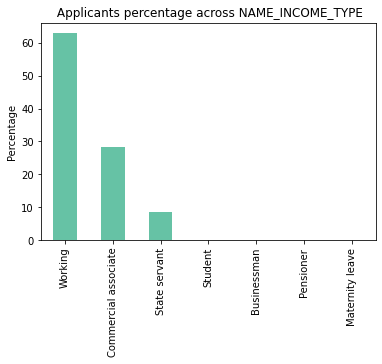

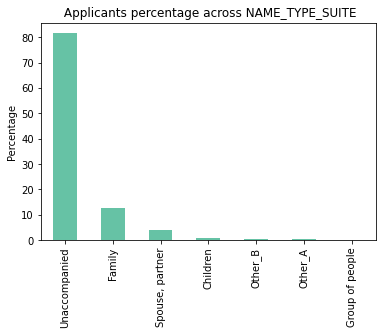

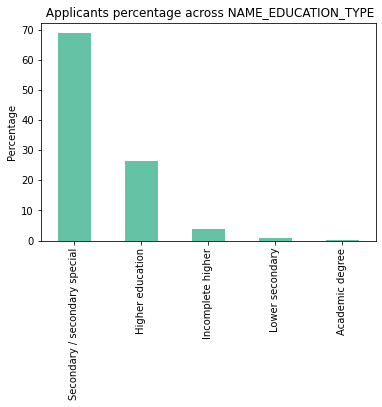

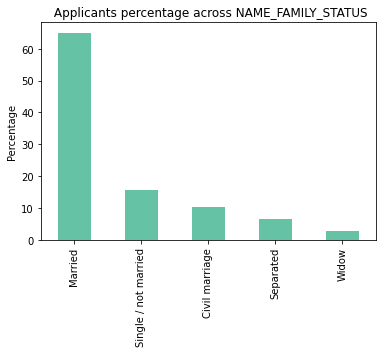

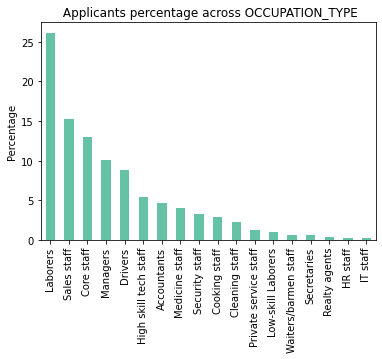

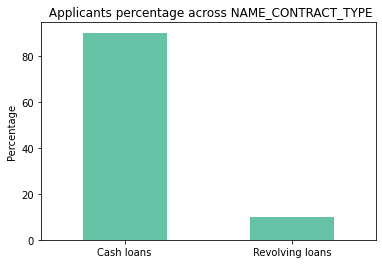

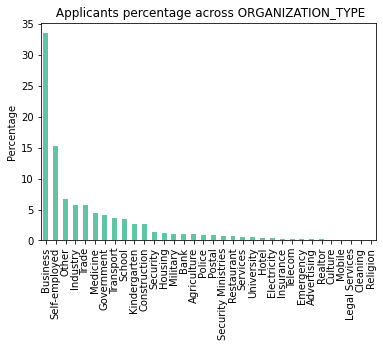

In [266]:
# Plotting barplots of percentage of applicants across variables
for col in ['TARGET', 'CODE_GENDER', 'NAME_INCOME_TYPE', 'NAME_TYPE_SUITE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'OCCUPATION_TYPE', 'NAME_CONTRACT_TYPE', 'ORGANIZATION_TYPE']:
    ax = (app_data[col].value_counts(normalize=True) * 100).plot.bar()
    plt.ylabel('Percentage')
    # Rotating x-labels only for the ones who dont fit horizontally
    if col in ['NAME_INCOME_TYPE', 'NAME_TYPE_SUITE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE']:
         plt.xticks(rotation=90)
    else:
        plt.xticks(rotation=0)
    plt.title(f" Applicants percentage across {col}")
    plt.show()
    print()
    print()

#### KDE Plot of Credit Amount, Total Income, Goods Price and Annuity Amount

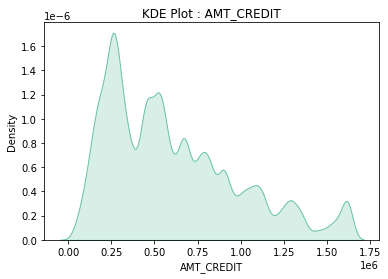

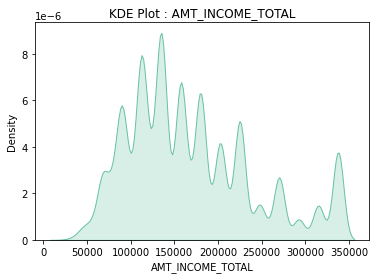

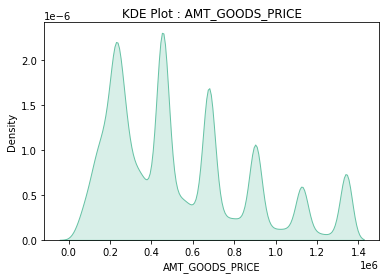

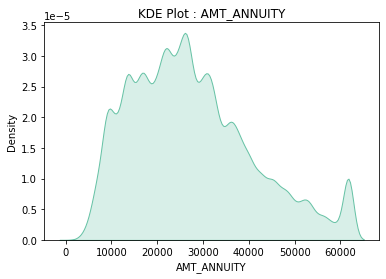

In [267]:
for kde in ['AMT_CREDIT', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'AMT_ANNUITY']:
    sns.kdeplot(data=app_data[kde], shade=True)
    plt.title(f"KDE Plot : {kde}")
    plt.show()
    print()
    print()

### Bivariate Analysis
#### Checking the defaulters and non-defaulters across various categorical variables


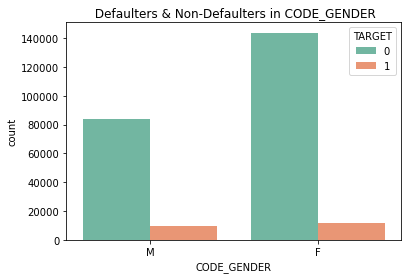

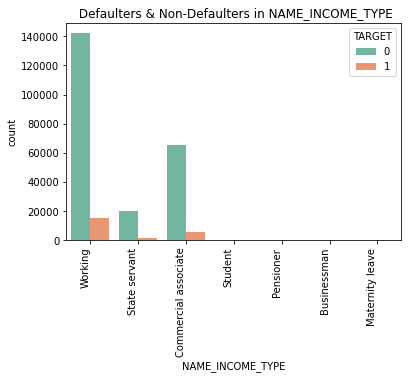

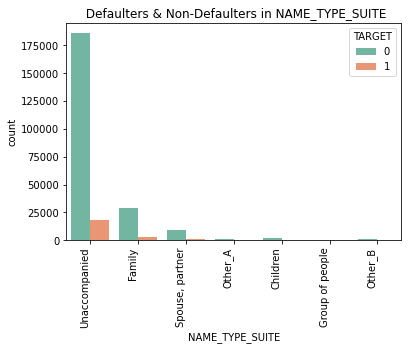

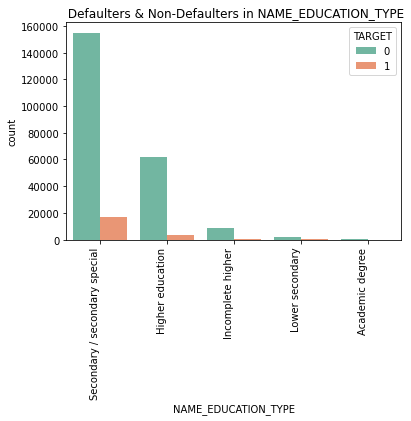

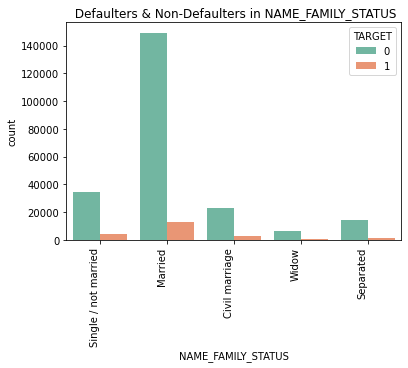

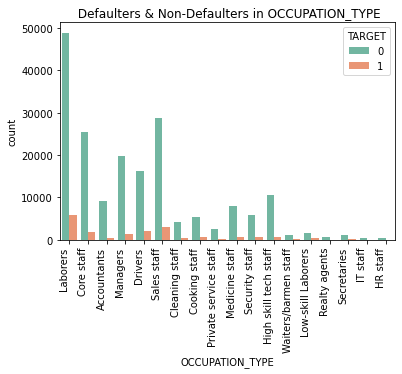

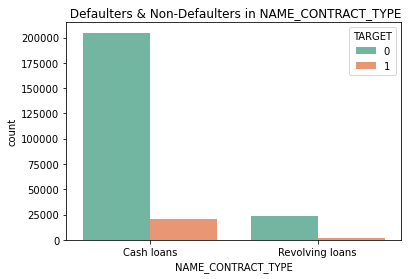

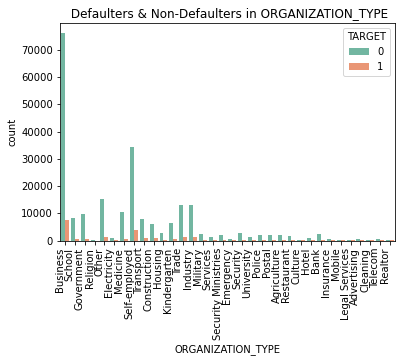

In [268]:
for col in ['CODE_GENDER','NAME_INCOME_TYPE','NAME_TYPE_SUITE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','OCCUPATION_TYPE','NAME_CONTRACT_TYPE','ORGANIZATION_TYPE']:    
    ax=sns.countplot(data = app_data, x=col, hue='TARGET')
    if col in ['NAME_INCOME_TYPE','NAME_TYPE_SUITE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','OCCUPATION_TYPE','ORGANIZATION_TYPE']:
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
    plt.title(f" Defaulters & Non-Defaulters in {col}")
    plt.show()
    print()
    print()

#### Checking percentage of defaulters within each category with groupby and plotting barplot

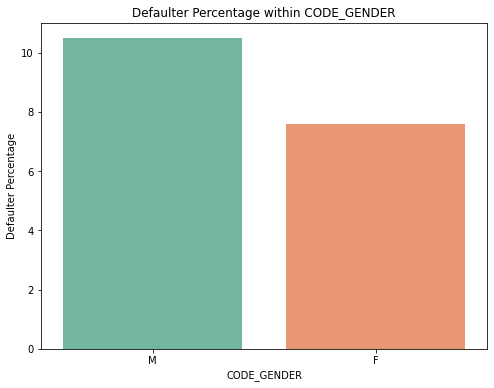

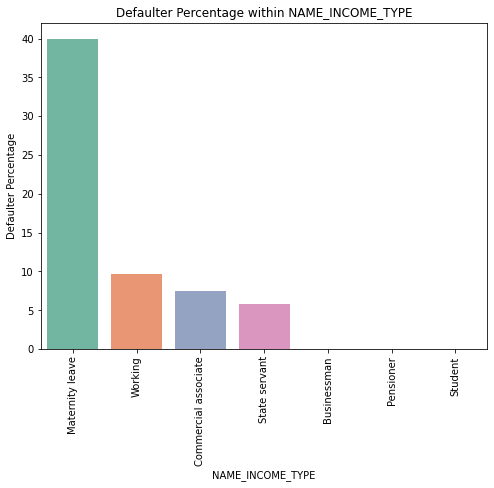

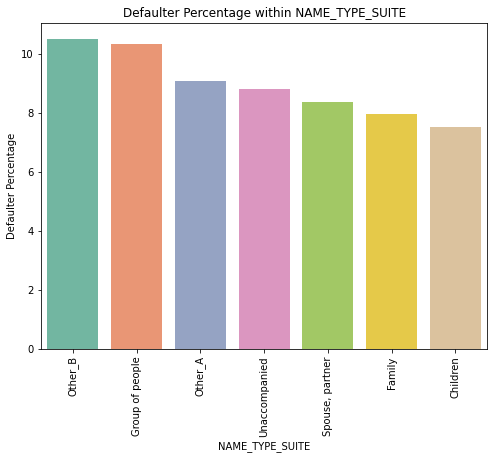

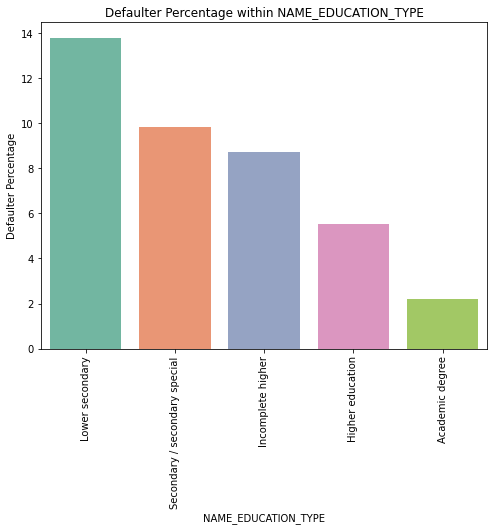

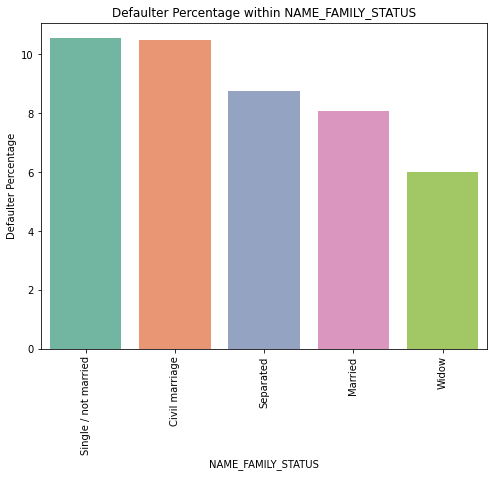

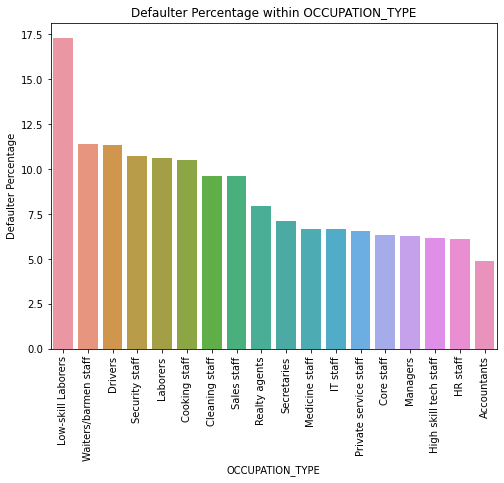

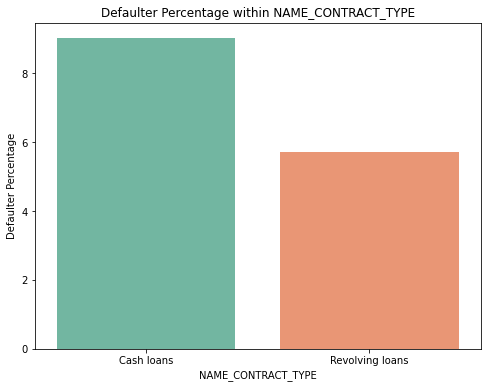

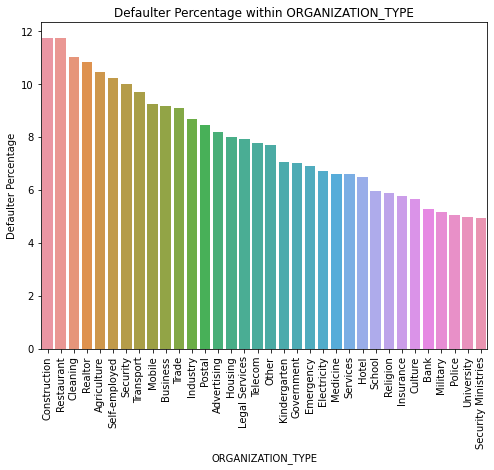

In [269]:
for col in ['CODE_GENDER', 'NAME_INCOME_TYPE', 'NAME_TYPE_SUITE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'OCCUPATION_TYPE', 'NAME_CONTRACT_TYPE', 'ORGANIZATION_TYPE']:
    result = (app_data[[col, 'TARGET']].groupby(col).mean() * 100).sort_values(by='TARGET', ascending=False)
    plt.figure(figsize=(8, 6))
    ax = sns.barplot(x=result.index, y='TARGET', data=result)
    ax.set_xlabel(col)
    ax.set_ylabel('Defaulter Percentage')
    ax.set_title('Defaulter Percentage within ' + col)
    if col in ['NAME_INCOME_TYPE', 'NAME_TYPE_SUITE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE']:
         plt.xticks(rotation=90)
    else:
        plt.xticks(rotation=0)
    plt.show()
    print()
    print()

In [270]:
# Groupby for defaulters within each category
for col in ['CODE_GENDER', 'NAME_INCOME_TYPE', 'NAME_TYPE_SUITE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'OCCUPATION_TYPE', 'NAME_CONTRACT_TYPE', 'ORGANIZATION_TYPE']:
    result = (app_data[[col, 'TARGET']].groupby(col).mean() * 100).sort_values(by='TARGET', ascending=False)
    print(result)
    print()
    print()

                TARGET
CODE_GENDER           
M            10.490447
F             7.603876


                         TARGET
NAME_INCOME_TYPE               
Maternity leave       40.000000
Working                9.620689
Commercial associate   7.517692
State servant          5.761719
Businessman            0.000000
Pensioner              0.000000
Student                0.000000


                    TARGET
NAME_TYPE_SUITE           
Other_B          10.526316
Group of people  10.328638
Other_A           9.078947
Unaccompanied     8.814037
Spouse, partner   8.369723
Family            7.973222
Children          7.516779


                                  TARGET
NAME_EDUCATION_TYPE                     
Lower secondary                13.776408
Secondary / secondary special   9.838231
Incomplete higher               8.716356
Higher education                5.528013
Academic degree                 2.189781


                         TARGET
NAME_FAMILY_STATUS             
Single / not marri

#### Box Plots to analyze the spread of Total Income, Age, Years Employed and Credit Amount, Goods Price & Annuity by Target

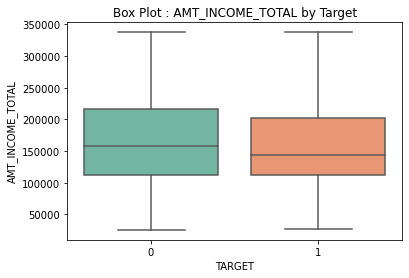

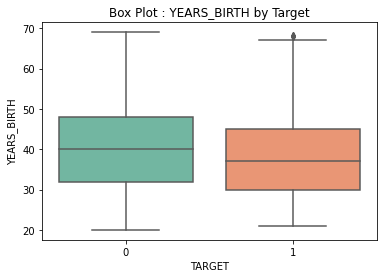

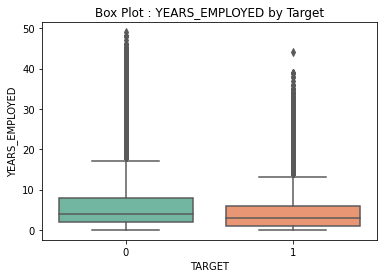

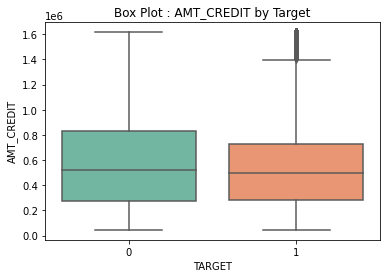

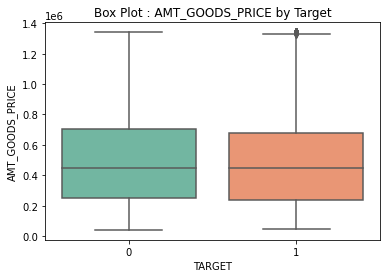

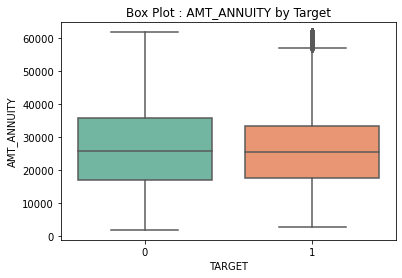

In [271]:
for box in ['AMT_INCOME_TOTAL','YEARS_BIRTH','YEARS_EMPLOYED','AMT_CREDIT','AMT_GOODS_PRICE','AMT_ANNUITY']:
    sns.boxplot( app_data['TARGET'], app_data[box])
    plt.title(f'Box Plot : {box} by Target')
    plt.show()

#### KDE Plot to analyze the distribution of Total Income, Age, Years Employed, Credit Amount, Goods Price & Annuity by Target

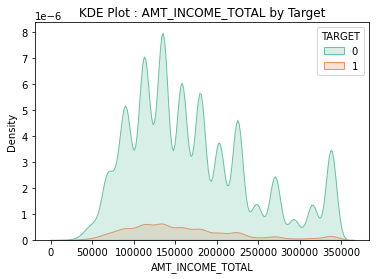

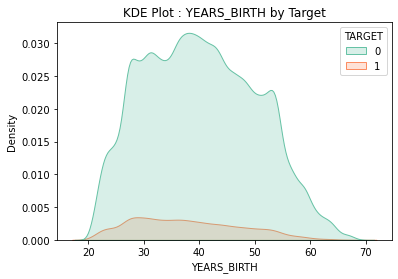

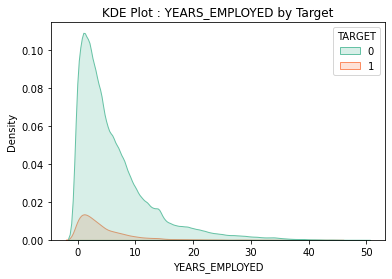

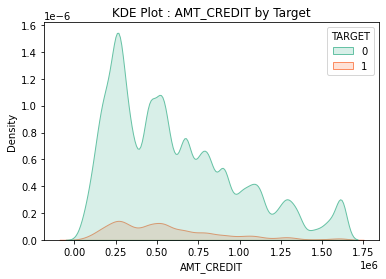

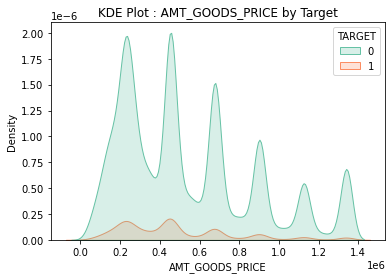

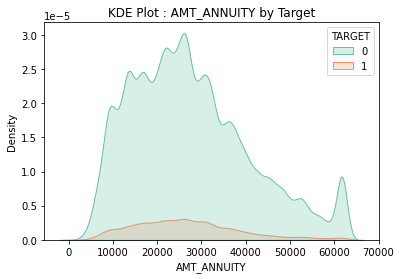

In [272]:
for kde in ['AMT_INCOME_TOTAL','YEARS_BIRTH','YEARS_EMPLOYED','AMT_CREDIT','AMT_GOODS_PRICE','AMT_ANNUITY']:
    sns.kdeplot( data = app_data, x=app_data[kde],  hue='TARGET', shade=True)
    plt.title(f"KDE Plot : {kde} by Target")
    plt.show()
    print()

### Multivariate Analysis
#### Pair plots for Total Income, Total Credit, Total Goods Price & Total Annuity
#### Pair plots for Total Income, Age, & Years Employed

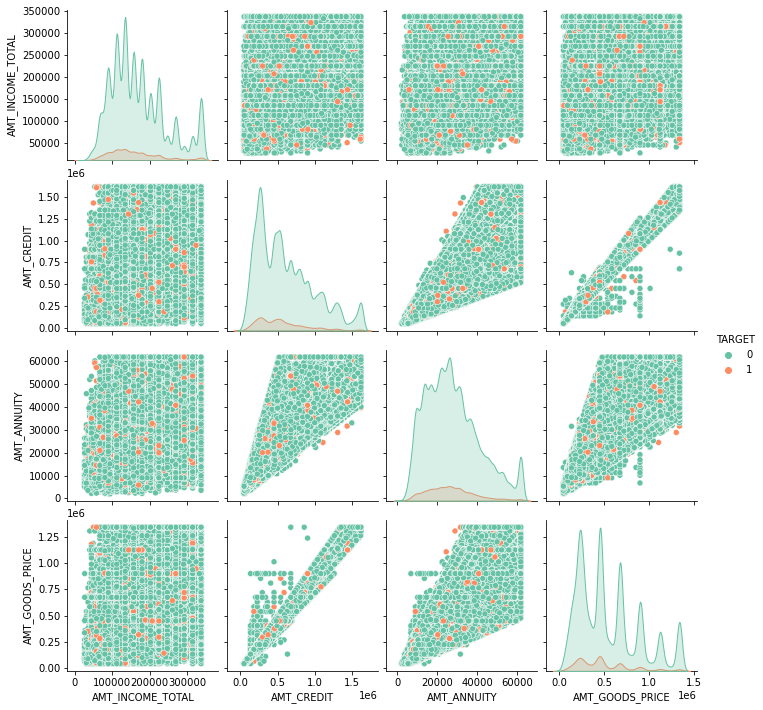

In [273]:
sns.pairplot(data = app_data, vars =['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE'], hue='TARGET')
plt.show()

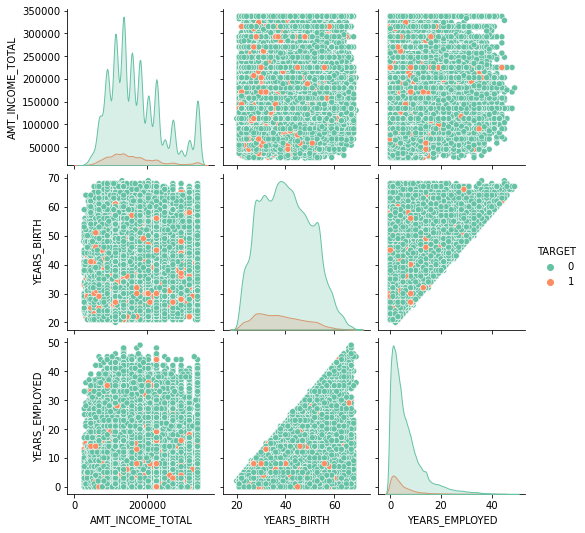

In [274]:
sns.pairplot(data = app_data, vars = ['AMT_INCOME_TOTAL','YEARS_BIRTH','YEARS_EMPLOYED'], hue='TARGET')
plt.show()

#### Correlation Matrix

In [275]:
# Segmenting to defaulters and non-defaulters
app_data_1 = app_data[app_data['TARGET']==1]
app_data_0 = app_data[app_data['TARGET']==0]

In [276]:
# Getting strong positive correlation values for defaulters
corr_matrix     = app_data_1.corr() # Making a mtrix of correlation values
subset_positive = corr_matrix[(corr_matrix>(0.6)) & (corr_matrix<0.99)] # Filtering out highest correlation values
subset_positive = subset_positive.dropna(how='all', axis= 0).dropna(how='all', axis= 1) # Dropping the NAs across the whole matrix
subset_positive =subset_positive.unstack().reset_index().dropna().sort_values(by=0,ascending=False) # Unstaking / unpivoting it to get it in a tabular format
subset_positive = subset_positive.rename(columns={'level_0': 'Column 1', 'level_1': 'Column 2', 0: 'Correlation'}) #Renaming the columns
subset_positive = subset_positive.drop(subset_positive.index[::2]) #Dropping the rows where the Column1-Column2 is duplicated
subset_positive.style.background_gradient(subset='Correlation', cmap='Blues')

,Column 1,Column 2,Correlation
40,AMT_GOODS_PRICE,AMT_CREDIT,0.981745
83,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.956380
52,CNT_FAM_MEMBERS,CNT_CHILDREN,0.893874
167,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.868951
111,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.846245
139,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.767803
41,AMT_GOODS_PRICE,AMT_ANNUITY,0.756892
27,AMT_ANNUITY,AMT_CREDIT,0.755463


In [277]:
# Getting strong negative correlation values for defaulters
corr_matrix     = app_data_1.corr() # Making a mtrix of correlation values
subset_negative = corr_matrix[(corr_matrix>(-0.6)) & (corr_matrix<-0.99)] #Filtering out highest negative correlation values
subset_negative = subset_negative.dropna(how='all', axis= 0).dropna(how='all', axis= 1)  # Dropping the NAs across the whole matrix
subset_negative =subset_negative.unstack().reset_index().dropna().sort_values(by=0,ascending=False) # Unstaking / unpivoting it to get it in a tabular format
subset_negative = subset_negative.rename(columns={'level_0': 'Column 1', 'level_1': 'Column 2', 0: 'Correlation'})#Renaming the columns
subset_negative

,Column 1,Column 2,Correlation


In [278]:
# Getting strong positive correlation values for non-defaulters
corr_matrix     = app_data_0.corr() # Making a mtrix of correlation values
subset_positive = corr_matrix[(corr_matrix>(0.6)) & (corr_matrix<0.99)] # Filtering out highest correlation values
subset_positive = subset_positive.dropna(how='all', axis= 0).dropna(how='all', axis= 1) # Dropping the NAs across the whole matrix
subset_positive =subset_positive.unstack().reset_index().dropna().sort_values(by=0,ascending=False) # Unstaking / unpivoting it to get it in a tabular format
subset_positive = subset_positive.rename(columns={'level_0': 'Column 1', 'level_1': 'Column 2', 0: 'Correlation'}) #Renaming the columns
subset_positive = subset_positive.drop(subset_positive.index[::2]) #Dropping the rows where the Column1-Column2 is duplicated
subset_positive.style.background_gradient(subset='Correlation', cmap='Blues')

,Column 1,Column 2,Correlation
40,AMT_GOODS_PRICE,AMT_CREDIT,0.985222
83,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.949221
52,CNT_FAM_MEMBERS,CNT_CHILDREN,0.893379
167,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.861480
111,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.859861
139,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.820925
41,AMT_GOODS_PRICE,AMT_ANNUITY,0.787731
27,AMT_ANNUITY,AMT_CREDIT,0.785454


In [279]:
# Getting strong negative correlation values for non-defaulters
corr_matrix     = app_data_0.corr() # Making a mtrix of correlation values
subset_negative = corr_matrix[(corr_matrix>(-0.6)) & (corr_matrix<-0.99)] #Filtering out highest negative correlation values
subset_negative = subset_negative.dropna(how='all', axis= 0).dropna(how='all', axis= 1)  # Dropping the NAs across the whole matrix
subset_negative =subset_negative.unstack().reset_index().dropna().sort_values(by=0,ascending=False) # Unstaking / unpivoting it to get it in a tabular format
subset_negative = subset_negative.rename(columns={'level_0': 'Column 1', 'level_1': 'Column 2', 0: 'Correlation'})#Renaming the columns
subset_negative

,Column 1,Column 2,Correlation


# Data Analysis & Visualization - Previous Application Dataset


In [280]:
prev_app.head(5)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CONTRACT_STATUS,YEARS_DECISION,NAME_PAYMENT_TYPE,NAME_CLIENT_TYPE,NAME_PORTFOLIO,CHANNEL_TYPE,SELLERPLACE_AREA,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,Approved,0.200000,Cash through the bank,Repeater,POS,Country-wide,35,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,422820.0,504805.5,508738.5,THURSDAY,11,Y,1,Approved,0.449315,Cash through the bank,Repeater,Cash,Contact center,-1,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,1,Approved,0.824658,Cash through the bank,Repeater,Cash,Credit and cash offices,-1,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,42163.380,422820.0,470790.0,450000.0,MONDAY,7,Y,1,Approved,1.402740,Cash through the bank,Repeater,Cash,Credit and cash offices,-1,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,1,Refused,2.139726,Cash through the bank,Repeater,Cash,Credit and cash offices,-1,24.0,high,Cash Street: high


### Univariate Analysis 
#### Countplots to see no of previous applications across various categories

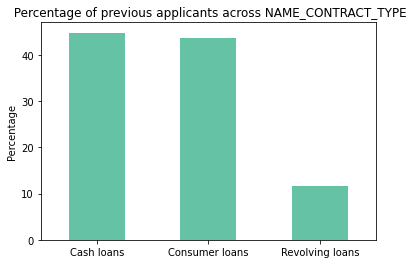

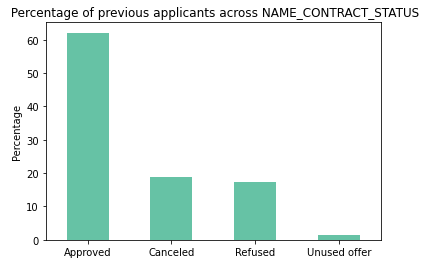

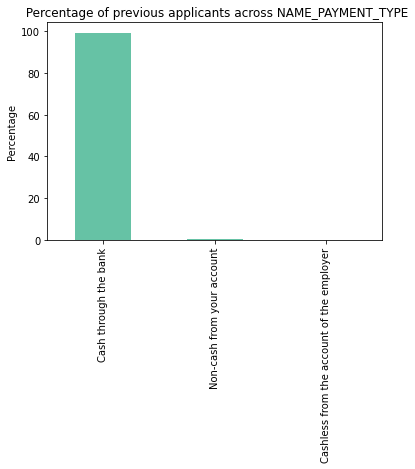

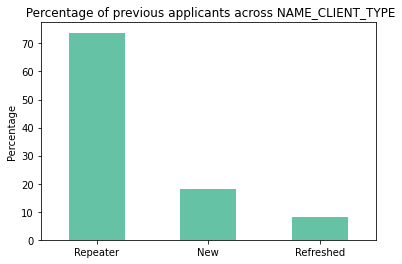

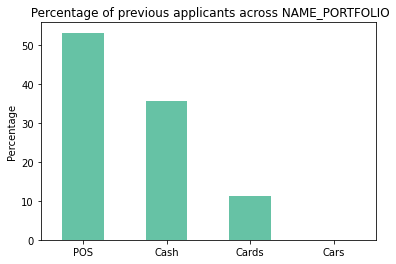

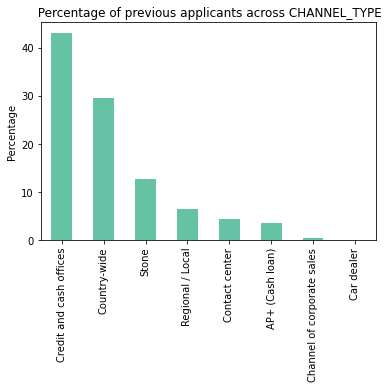

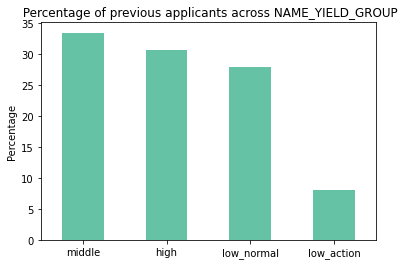

In [281]:
 for col in ['NAME_CONTRACT_TYPE','NAME_CONTRACT_STATUS','NAME_PAYMENT_TYPE', 'NAME_CLIENT_TYPE','NAME_PORTFOLIO','CHANNEL_TYPE','NAME_YIELD_GROUP']: 
    ax = (prev_app[col].value_counts(normalize=True) * 100).plot.bar()
    plt.ylabel('Percentage')
    if col in ['NAME_PAYMENT_TYPE','CHANNEL_TYPE']:
        plt.xticks(rotation=90)
    else:
        plt.xticks(rotation=0)
    plt.title(f' Percentage of previous applicants across {col}')
    plt.show()
    print()
    print()

In [282]:
# Checking value counts in percentage for the different columns
for col in ['NAME_CONTRACT_TYPE','NAME_CONTRACT_STATUS','NAME_PAYMENT_TYPE', 'NAME_CLIENT_TYPE','NAME_PORTFOLIO','CHANNEL_TYPE','NAME_YIELD_GROUP']:    
    result = (prev_app[col].value_counts(normalize=True) * 100)
    print(result)
    print()
    print()

Cash loans         44.746290
Consumer loans     43.685631
Revolving loans    11.568079
Name: NAME_CONTRACT_TYPE, dtype: float64


Approved        62.125178
Canceled        18.887409
Refused         17.404429
Unused offer     1.582984
Name: NAME_CONTRACT_STATUS, dtype: float64


Cash through the bank                        99.444040
Non-cash from your account                    0.490909
Cashless from the account of the employer     0.065051
Name: NAME_PAYMENT_TYPE, dtype: float64


Repeater     73.801775
New          18.066869
Refreshed     8.131356
Name: NAME_CLIENT_TYPE, dtype: float64


POS      53.237883
Cash     35.559664
Cards    11.169687
Cars      0.032766
Name: NAME_PORTFOLIO, dtype: float64


Credit and cash offices       43.093039
Country-wide                  29.618340
Stone                         12.708418
Regional / Local               6.501188
Contact center                 4.265477
AP+ (Cash loan)                3.418437
Channel of corporate sales     0.368002
Car deale

### Bivariate Analysis 
#### KDE plots to see the distribution of Credit, Application, Goods Price & Annuity amounts split by Contract Status

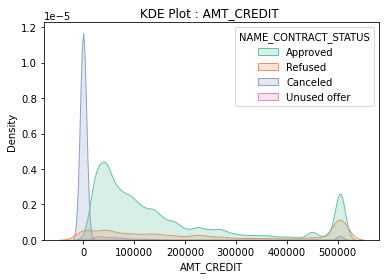

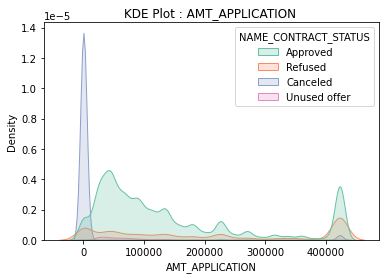

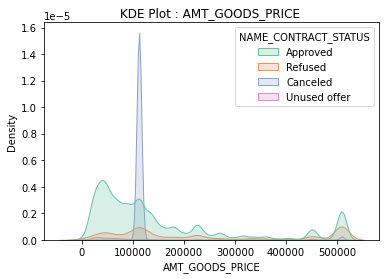

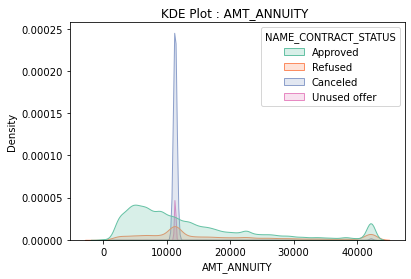

In [283]:
# Drawing KDE plots for below columns, split by contract status
for kde in ['AMT_CREDIT','AMT_APPLICATION','AMT_GOODS_PRICE','AMT_ANNUITY']:
    sns.kdeplot( data = prev_app, x=prev_app[kde],  hue='NAME_CONTRACT_STATUS',shade=True)
    plt.title(f'KDE Plot : {kde} ')
    plt.show()
    print()
    print()

### Multivariate Analysis

#### Correlation Matrix

In [284]:
# Getting strong positive correlation values
corr_matrix     = prev_app.corr() # Making a mtrix of correlation values
subset_positive = corr_matrix[(corr_matrix>(0.5)) & (corr_matrix<0.99)] # Filtering out highest correlation values
subset_positive = subset_positive.dropna(how='all', axis= 0).dropna(how='all', axis= 1) # Dropping the NAs across the whole matrix
subset_positive =subset_positive.unstack().reset_index().dropna().sort_values(by=0,ascending=False) # Unstaking / unpivoting it to get it in a tabular format
subset_positive = subset_positive.rename(columns={'level_0': 'Column 1', 'level_1': 'Column 2', 0: 'Correlation'}) #Renaming the columns
subset_positive = subset_positive.drop([7,8,13,15,10,1,19,9,14]) #Dropping the rows where the Column1-Column2 combination is duplicated
subset_positive.style.background_gradient(subset='Correlation', cmap='Blues')

,Column 1,Column 2,Correlation
11,AMT_CREDIT,AMT_APPLICATION,0.941141
16,AMT_GOODS_PRICE,AMT_APPLICATION,0.941061
17,AMT_GOODS_PRICE,AMT_CREDIT,0.923592
3,AMT_ANNUITY,AMT_GOODS_PRICE,0.857584
2,AMT_ANNUITY,AMT_CREDIT,0.823068
5,AMT_APPLICATION,AMT_ANNUITY,0.798669
23,CNT_PAYMENT,AMT_GOODS_PRICE,0.691801
21,CNT_PAYMENT,AMT_APPLICATION,0.669099
22,CNT_PAYMENT,AMT_CREDIT,0.637245


In [285]:
# Getting strong negative correlation values
corr_matrix     = prev_app.corr() # Making a mtrix of correlation values
subset_negative = corr_matrix[(corr_matrix>(-0.6)) & (corr_matrix<-0.99)] #Filtering out highest negative correlation values
subset_negative = subset_negative.dropna(how='all', axis= 0).dropna(how='all', axis= 1)  # Dropping the NAs across the whole matrix
subset_negative =subset_negative.unstack().reset_index().dropna().sort_values(by=0,ascending=False) # Unstaking / unpivoting it to get it in a tabular format
subset_negative = subset_negative.rename(columns={'level_0': 'Column 1', 'level_1': 'Column 2', 0: 'Correlation'})#Renaming the columns
subset_negative

,Column 1,Column 2,Correlation


#### Pairplots between Credit Amount, Application Amount, Goods Price, Annuity Amount, Term of previous credit (CNT Payment)

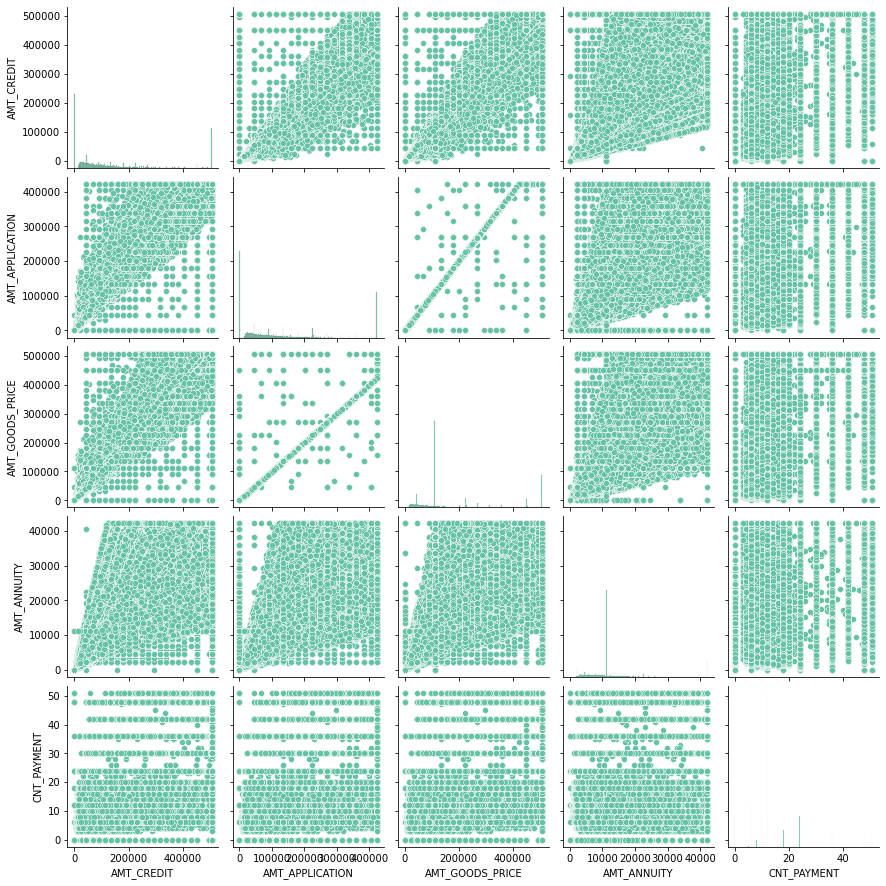

In [286]:
sns.pairplot(data = prev_app, vars= ['AMT_CREDIT','AMT_APPLICATION','AMT_GOODS_PRICE','AMT_ANNUITY','CNT_PAYMENT'])
plt.show()

### Merging the two datasets

In [287]:
# Merging the two datasets with an inner join on the common column SK_ID_CURR
merged = app_data.merge(prev_app, on =['SK_ID_CURR'], how ='inner')

In [288]:
merged.isnull().mean()*100

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE_x             0.000000
CODE_GENDER                      0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT_x                     0.000000
AMT_ANNUITY_x                    0.000000
AMT_GOODS_PRICE_x                0.000000
NAME_TYPE_SUITE                  0.000000
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
YEARS_BIRTH                      0.000000
YEARS_EMPLOYED                   0.000000
YEARS_REGISTRATION               0.000000
YEARS_ID_PUBLISH                 0.000000
OCCUPATION_TYPE                 16.131435
CNT_FAM_MEMBERS                  0.000000
REGION_RATING_CLIENT             0.000000
REGION_RATING_CLIENT_W_CITY      0.000000
WEEKDAY_APPR_PROCESS_START_x     0

In [289]:
merged.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,YEARS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CONTRACT_STATUS,YEARS_DECISION,NAME_PAYMENT_TYPE,NAME_CLIENT_TYPE,NAME_PORTFOLIO,CHANNEL_TYPE,SELLERPLACE_AREA,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25,1,9.0,5,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business,0.262949,0.139376,2.0,2.0,2.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,1038818,Consumer loans,9251.775,179055.0,179055.0,179055.0,SATURDAY,9,Y,1,Approved,1.660274,Cash through the bank,New,POS,Stone,500,24.0,low_normal,POS other with interest
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45,3,3.0,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1810518,Cash loans,42163.380,422820.0,504805.5,508738.5,FRIDAY,12,Y,1,Approved,2.043836,Cash through the bank,Repeater,Cash,Credit and cash offices,-1,12.0,low_normal,Cash X-Sell: low
2,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45,3,3.0,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2636178,Consumer loans,42163.380,337500.0,348637.5,337500.0,SUNDAY,17,Y,1,Approved,2.268493,Cash through the bank,Refreshed,POS,Stone,1400,6.0,middle,POS industry with interest
3,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45,3,3.0,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2396755,Consumer loans,6737.310,68809.5,68053.5,68809.5,SATURDAY,15,Y,1,Approved,6.413699,Cash through the bank,Refreshed,POS,Country-wide,200,12.0,middle,POS household with interest
4,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52,0,11.0,6,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1564014,Consumer loans,5357.250,24282.0,20106.0,24282.0,FRIDAY,5,Y,1,Approved,2.232877,Cash through the bank,New,POS,Regional / Local,30,4.0,middle,POS mobile without interest


### Bivariate Analysis 
#### Contract Status vs Age and Years Employed

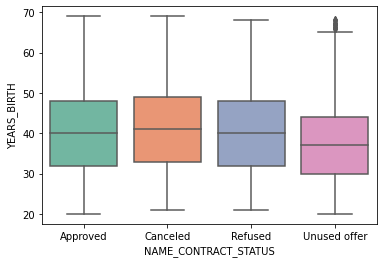

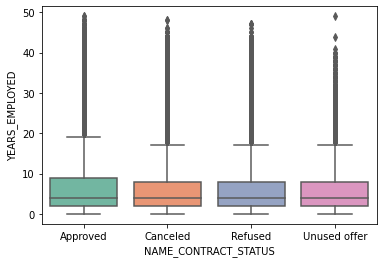

In [290]:
for x in ['YEARS_BIRTH','YEARS_EMPLOYED']:
    sns.boxplot(merged['NAME_CONTRACT_STATUS'], merged[x])
    plt.show()

#### Finding percentage distribution of  'Approved', 'Canceled', 'Refused' and 'Unused offer' within each category of Gender, Income Type and Family Status.
##### This approach has been taken since the number of applicants within each category will affect the Contract Status (Approved, Refused etc), i.e if there are more applicants for Females, then the approval rating within Females will be higher. Hence we are checking the Contract Statuses as a % within each category

In [291]:
for col in ['CODE_GENDER', 'NAME_INCOME_TYPE','NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS','TARGET']: # Iterate over categorical variables 
    grouped = merged.groupby([col, 'NAME_CONTRACT_STATUS']).size().reset_index(name='count') # Group the variable, size() counts the occurrences & the index is reset
    x = grouped.groupby(col).sum() # Group it again by the categorical variable and assign to dataframe x and do a sum, this gives total counts by col
    joined = grouped.merge(x,on=col,how='left') # Left join grouped and dataframe x, on the categorical column col
    joined['Percent']= (joined['count_x']/joined['count_y'])*100 # Percent distribution of contract status calculated within each categorical column col
    joined.drop(['count_x','count_y'],axis=1,inplace=True) # Drop the intermediate values to retain only the percentages
    print(joined)
    print()
    print()
    print()

  CODE_GENDER NAME_CONTRACT_STATUS    Percent
0           F             Approved  62.974573
1           F             Canceled  17.934122
2           F              Refused  17.352883
3           F         Unused offer   1.738423
4           M             Approved  62.617554
5           M             Canceled  17.172322
6           M              Refused  18.225356
7           M         Unused offer   1.984768



        NAME_INCOME_TYPE NAME_CONTRACT_STATUS    Percent
0   Commercial associate             Approved  61.801785
1   Commercial associate             Canceled  18.555111
2   Commercial associate              Refused  18.063305
3   Commercial associate         Unused offer   1.579799
4        Maternity leave             Approved  62.500000
5        Maternity leave             Canceled  12.500000
6        Maternity leave              Refused  18.750000
7        Maternity leave         Unused offer   6.250000
8              Pensioner             Approved  52.054795
9            

#### Creating countplots for above bivariate analysis

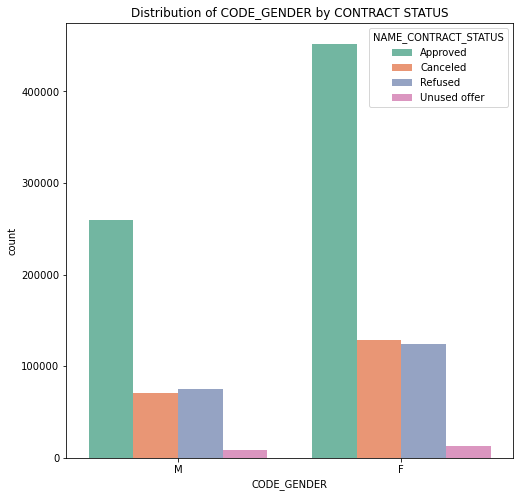

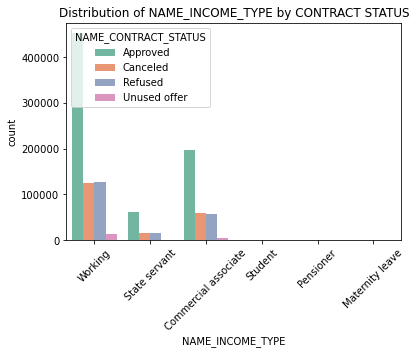

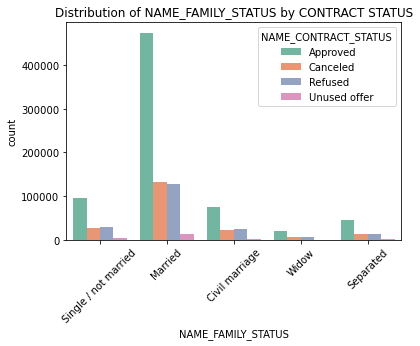

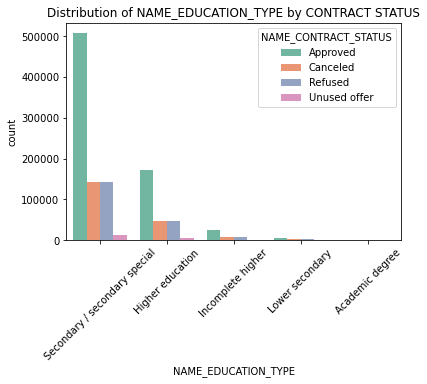

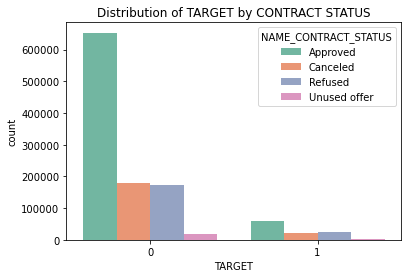

In [292]:
plt.figure(figsize=(8,8))
categorical_columns = ['CODE_GENDER', 'NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS','NAME_EDUCATION_TYPE','TARGET']
for col in categorical_columns:
    sns.countplot(data=merged, x=col, hue='NAME_CONTRACT_STATUS')
    if col in ['NAME_INCOME_TYPE','NAME_EDUCATION_TYPE', 'NAME_INCOME_TYPE','NAME_FAMILY_STATUS']:
        plt.xticks(rotation=45)
    plt.title(f'Distribution of {col} by CONTRACT STATUS')
    plt.show()
    print()
    print()